## Engenharia de Atributos em Dados Médicos

In [1]:
from platform import python_version
print(python_version())

3.11.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as ns

In [3]:
%reload_ext watermark
%watermark --iversions

pandas    : 1.5.3
matplotlib: 3.7.0
seaborn   : 0.12.2
numpy     : 1.24.2



In [4]:
dados = pd.read_csv('projeto8_analise_de_dados_pyton/dados/diabetic_data.csv')

In [5]:
dados.shape

(101766, 50)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
dados.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
dados.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [10]:
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [11]:
for col in list(dados.columns):
    
    list_of_unique_values = dados[col].unique()
    
    if len(list_of_unique_values)<15:
        print(f'\n {col} : {len(list_of_unique_values)} valores unicos')
        print(list_of_unique_values)
    else:
        print(f'\n {col} : {len(list_of_unique_values)} valores unicos')


 encounter_id : 101766 valores unicos

 patient_nbr : 71518 valores unicos

 race : 6 valores unicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

 gender : 3 valores unicos
['Female' 'Male' 'Unknown/Invalid']

 age : 10 valores unicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

 weight : 10 valores unicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

 admission_type_id : 8 valores unicos
[6 1 2 3 4 5 8 7]

 discharge_disposition_id : 26 valores unicos

 admission_source_id : 17 valores unicos

 time_in_hospital : 14 valores unicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]

 payer_code : 18 valores unicos

 medical_specialty : 73 valores unicos

 num_lab_procedures : 118 valores unicos

 num_procedures : 7 valores unicos
[0 5 1 6 2 3 4]

 num_medications : 75 valores unicos

 number_outpatient : 39 valores unicos

 number_emergency : 33 valores unico

In [12]:
for col in list(dados.columns):
    
    list_of_unique_values = dados[col].unique()
    
    if len(list_of_unique_values)<15:
        print(f'\n {col} : {len(list_of_unique_values)} valores unicos')
        print(list_of_unique_values)
    else:
        print(f'\n {col} : {len(list_of_unique_values)} valores unicos')


 encounter_id : 101766 valores unicos

 patient_nbr : 71518 valores unicos

 race : 6 valores unicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

 gender : 3 valores unicos
['Female' 'Male' 'Unknown/Invalid']

 age : 10 valores unicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

 weight : 10 valores unicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

 admission_type_id : 8 valores unicos
[6 1 2 3 4 5 8 7]

 discharge_disposition_id : 26 valores unicos

 admission_source_id : 17 valores unicos

 time_in_hospital : 14 valores unicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]

 payer_code : 18 valores unicos

 medical_specialty : 73 valores unicos

 num_lab_procedures : 118 valores unicos

 num_procedures : 7 valores unicos
[0 5 1 6 2 3 4]

 num_medications : 75 valores unicos

 number_outpatient : 39 valores unicos

 number_emergency : 33 valores unico

In [13]:
for col in dados.columns:
    if dados[col].dtype == object:
        if dados[col][dados[col] == '?'].count() > 0:
            print(col,':', dados[col][dados[col] == '?'].count(),  'valores com o caracter "?"')
            print(round(dados[col][dados[col] == '?'].count() / len(dados.index) * 100,2), '% do total')

race : 2273 valores com o caracter "?"
2.23 % do total
weight : 98569 valores com o caracter "?"
96.86 % do total
payer_code : 40256 valores com o caracter "?"
39.56 % do total
medical_specialty : 49949 valores com o caracter "?"
49.08 % do total
diag_1 : 21 valores com o caracter "?"
0.02 % do total
diag_2 : 358 valores com o caracter "?"
0.35 % do total
diag_3 : 1423 valores com o caracter "?"
1.4 % do total


In [14]:
dados = dados.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

In [15]:
dados = dados[dados['race'] != '?']
dados = dados[dados['diag_1'] != '?']
dados = dados[dados['diag_2'] != '?']
dados = dados[dados['diag_3'] != '?']
dados = dados[dados['gender'] != 'Unknown/Invalid']

In [16]:
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

In [17]:
dados.shape

(98052, 47)

In [18]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [19]:
dados.loc[:, dados.nunique() == 1]

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No
...,...,...,...
101761,No,No,No
101762,No,No,No
101763,No,No,No
101764,No,No,No


In [20]:
dados = dados.loc[:, dados.nunique() != 1]

In [21]:
dados.shape

(98052, 44)

In [22]:
dados['readmitted'].value_counts()

NO     52337
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [23]:
dados_clean1 = dados

In [24]:
dados.loc[dados['readmitted'] == '<30','readmitted'] = 1
dados.loc[dados['readmitted'] == '>30','readmitted'] = 1
dados.loc[dados['readmitted'] == 'NO','readmitted'] = 0

In [25]:
dados['readmitted'].value_counts()

0    52337
1    45715
Name: readmitted, dtype: int64

In [26]:
dados['readmitted'].unique()

array([1, 0], dtype=object)

In [27]:
dados['readmitted'].dtype

dtype('O')

In [28]:
round(dados['readmitted'].value_counts() / len(dados) * 100, 0)

0    53.0
1    47.0
Name: readmitted, dtype: float64

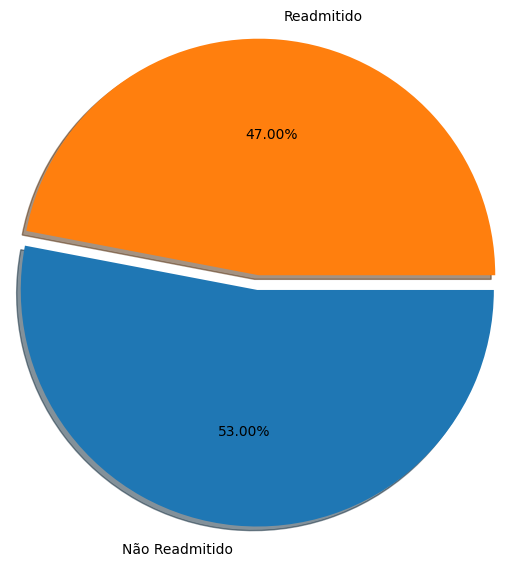

In [29]:
percentual = round(dados['readmitted'].value_counts() / len(dados) * 100, 0)
labels = ['Não Readmitido', 'Readmitido']

plt.axis('equal')
plt.pie(percentual,
       labels = labels,
       radius = 1.6,
       autopct = '%1.2f%%',
       explode = [0.05, 0.05],
       shadow = True,
       counterclock = False,
       pctdistance = 0.6)
plt.show()

In [30]:
dados.groupby(by='age').size()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[30-40)      3548
[40-50)      9265
[50-60)     16697
[60-70)     21809
[70-80)     25305
[80-90)     16702
[90-100)     2717
dtype: int64

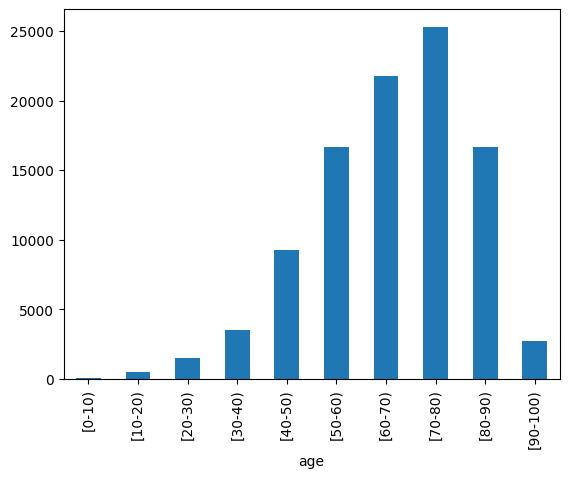

In [31]:
dados.groupby(by='age').size().plot(kind = 'bar')
plt.show()

In [32]:
dados['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                          for val in dados['age']], index = dados.index)

dados['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                          for val in dados['age']], index = dados.index)

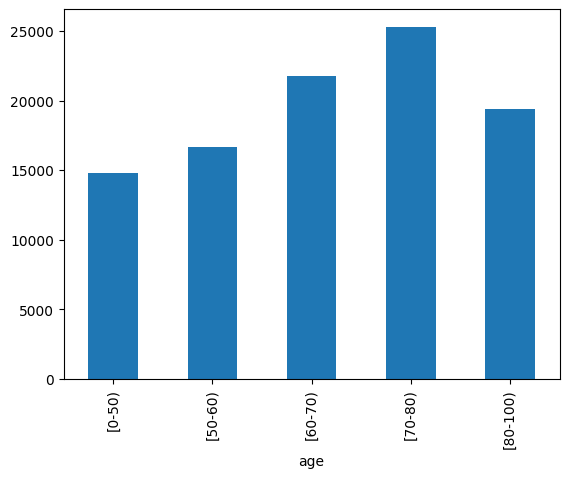

In [33]:
dados.groupby(by='age').size().plot(kind = 'bar')
plt.show()

In [34]:
dados['admission_type_id'].value_counts()

1    52178
3    18193
2    17543
6     5135
5     4661
8      312
7       20
4       10
Name: admission_type_id, dtype: int64

In [35]:
dados['admission_type_id'].unique(),dados['admission_type_id'].nunique()

(array([1, 2, 3, 6, 4, 5, 8, 7], dtype=int64), 8)

In [36]:
dados['admission_type_id'] = pd.Series(['Emergencia' if val == 1 else 'Outro'
                                       for val in dados['admission_type_id']], index = dados.index)

In [37]:
dados['admission_type_id'].value_counts()

Emergencia    52178
Outro         45874
Name: admission_type_id, dtype: int64

In [38]:
dados['discharge_disposition_id'].unique(),dados['discharge_disposition_id'].nunique()

(array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
        22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64),
 26)

In [39]:
dados['discharge_disposition_id'] = pd.Series(['Casa' if val == 1 else 'Outro'
                                       for val in dados['discharge_disposition_id']], index = dados.index)

In [40]:
dados['discharge_disposition_id'].unique(),dados['discharge_disposition_id'].nunique()

(array(['Casa', 'Outro'], dtype=object), 2)

In [41]:
dados['discharge_disposition_id'].value_counts()

Casa     57609
Outro    40443
Name: discharge_disposition_id, dtype: int64

In [42]:
dados['admission_source_id'].unique(),dados['admission_source_id'].nunique()

(array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
       dtype=int64),
 17)

In [43]:
dados['admission_source_id'] = pd.Series(['Sala_Emergencia' if val == 7 
                                          else 'Recomendacao' if val == 1 else 'Outro'
                                          for val in dados['admission_source_id']], index = dados.index)

In [44]:
dados['admission_source_id'].value_counts()

Sala_Emergencia    55951
Recomendacao       28355
Outro              13746
Name: admission_source_id, dtype: int64

In [45]:
diagnostico = dados[['diag_1', 'diag_2', 'diag_3']]

In [46]:
diagnostico.head(5)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250


In [47]:
diagnostico.isnull().sum()

diag_1    0
diag_2    0
diag_3    0
dtype: int64

In [48]:
import re

In [49]:
diagnostico.head(10)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


In [50]:
def calcula_comorbidade(row):
    
    codigos_doenca_diabetes = "^[2][5][0]"
    
    codigos_doenca_circulatorios = "^[3][9][0-9]|[4][0-5][0-9]"
    
    valor = 0
    
    if (not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
    not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and
    not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and
    (not(bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))) and
    not(bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))) and
    not(bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))))):
        valor = 0
        
    if (bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or
    bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or
    bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))) and
    (not(bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))) and
    not(bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))) and
    not(bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))))):
        valor = 1
        
    if (not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
    not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and
    not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and
    (bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))) or
    bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))) or
    bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))):
        valor = 2
        
    if (bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or
    bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or
    bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))) and
    (bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))) or
    bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))) or
    bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))):
        valor = 3
        
    return valor

In [51]:
%%time
dados['comorbidade'] = diagnostico.apply(calcula_comorbidade, axis = 1)

CPU times: total: 7.64 s
Wall time: 7.74 s


In [52]:
dados.shape

(98052, 45)

In [53]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,1,3
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,3
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,1,1


In [54]:
dados['comorbidade'].value_counts()

0    39216
2    22980
3    19730
1    16126
Name: comorbidade, dtype: int64

In [55]:
dados.drop(['diag_1', 'diag_2', 'diag_3'], axis = 1, inplace = True)

In [56]:
percent_com = pd.crosstab(dados.comorbidade, dados.readmitted, normalize = 'index') * 100

In [57]:
percent_com

readmitted,0,1
comorbidade,,
0,53.646471,46.353529
1,55.643061,44.356939
2,52.232376,47.767624
3,52.321338,47.678662


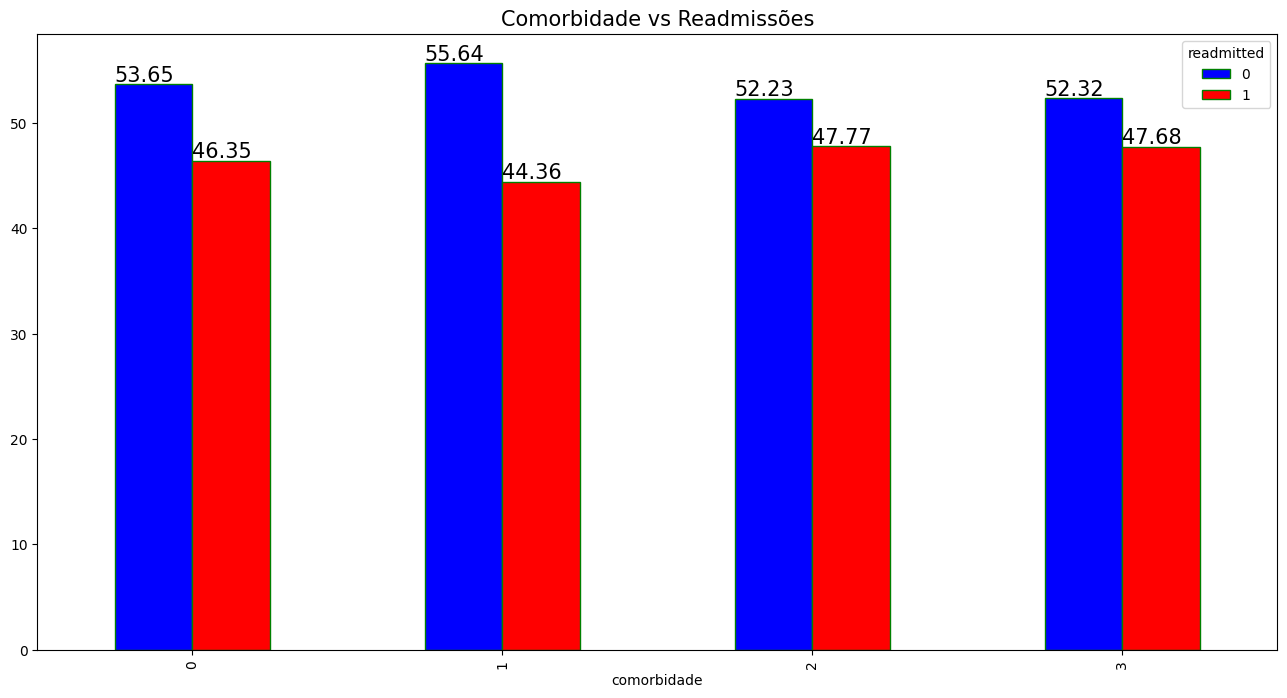

In [58]:
fig = percent_com.plot(kind = 'bar',
                       figsize = (16, 8),
                       width = 0.5,
                       edgecolor = 'g',
                       color = ['b', 'r'])
for i in fig.patches:
    fig.text(i.get_x() + 0.00,
            i.get_height() + 0.3,
            str(round((i.get_height()), 2)),
            fontsize = 15,
            color = 'black',
            rotation = 0)
plt.title('Comorbidade vs Readmissões', fontsize = 15)
plt.show()

Text(0, 0.5, 'Count')

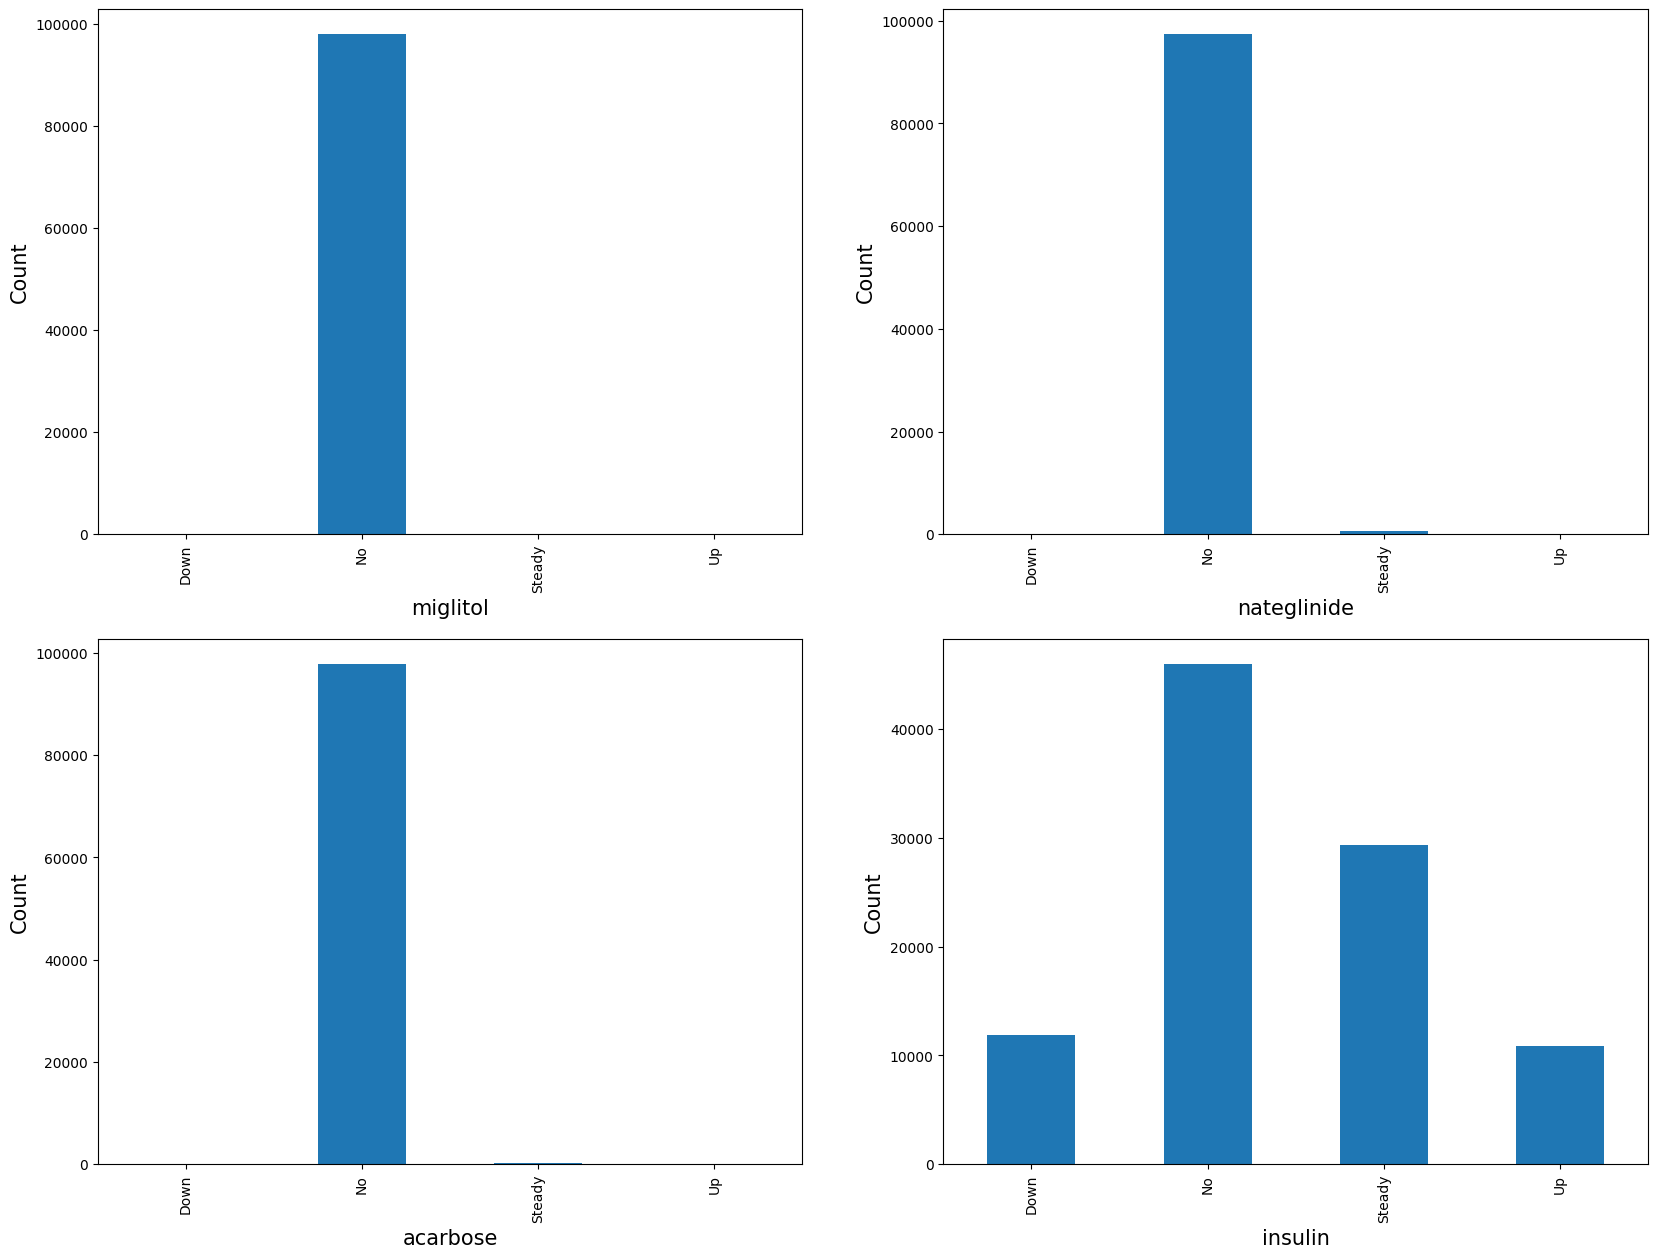

In [59]:
fig = plt.figure(figsize = (20, 15))

ax1 = fig.add_subplot(221)
ax1 = dados.groupby('miglitol').size().plot(kind = 'bar')
plt.xlabel('miglitol', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax2 = fig.add_subplot(222)
ax2 = dados.groupby('nateglinide').size().plot(kind = 'bar')
plt.xlabel('nateglinide', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax3 = fig.add_subplot(223)
ax3 = dados.groupby('acarbose').size().plot(kind = 'bar')
plt.xlabel('acarbose', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax4 = fig.add_subplot(224)
ax4 = dados.groupby('insulin').size().plot(kind = 'bar')
plt.xlabel('insulin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [60]:
# Lista com os nomes das variáveis de medicamentos (3 variáveis já tinham sido removidas)
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [61]:
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados[colname] = dados[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [62]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade,metformintemp,repaglinidetemp,nateglinidetemp,chlorpropamidetemp,glimepiridetemp,acetohexamidetemp,glipizidetemp,glyburidetemp,tolbutamidetemp,pioglitazonetemp,rosiglitazonetemp,acarbosetemp,miglitoltemp,troglitazonetemp,tolazamidetemp,insulintemp,glyburide-metformintemp,glipizide-metformintemp,glimepiride-pioglitazonetemp,metformin-pioglitazonetemp
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
dados['num_alt_dosagem_med'] = 0

In [64]:
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados['num_alt_dosagem_med'] = dados['num_alt_dosagem_med'] + dados[colname]
        del dados[colname]

In [65]:
dados['num_alt_dosagem_med'].value_counts()

0    71309
1    25350
2     1281
3      107
4        5
Name: num_alt_dosagem_med, dtype: int64

In [66]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,1,3,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,3,0
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,0,3,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,0,1,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,1,1,0


In [67]:
for col in medicamentos:
    if col in dados.columns:
        dados[col] = dados[col].replace('No', 0)
        dados[col] = dados[col].replace('Steady', 1)
        dados[col] = dados[col].replace('Up', 1)
        dados[col] = dados[col].replace('Down', 1)

In [68]:
dados['num_med'] = 0

In [69]:
for col in medicamentos:
    if col in dados.columns:
        dados['num_med'] = dados['num_med'] + dados[col]

In [70]:
dados['num_med'].value_counts()

1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: num_med, dtype: int64

In [71]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Ch,Yes,1,3,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,No,Yes,0,3,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Ch,Yes,0,3,1,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,Ch,Yes,0,1,0,2
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,No,Yes,1,1,0,1


In [72]:
dados = dados.drop(columns = medicamentos)

In [73]:
dados.shape

(98052, 24)

In [74]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,None,None,Ch,Yes,1,3,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,None,None,No,Yes,0,3,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,None,None,Ch,Yes,0,3,1,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,None,None,Ch,Yes,0,1,0,2
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,None,None,No,Yes,1,1,0,1


In [75]:
dados['change'].value_counts()

No    52774
Ch    45278
Name: change, dtype: int64

In [76]:
dados['gender'].value_counts()

Female    52833
Male      45219
Name: gender, dtype: int64

In [77]:
dados['diabetesMed'].value_counts()

Yes    75350
No     22702
Name: diabetesMed, dtype: int64

In [78]:
dados['change'] = dados['change'].replace('Ch', 1)
dados['change'] = dados['change'].replace('No', 0)
dados['gender'] = dados['gender'].replace('Male', 1)
dados['gender'] = dados['gender'].replace('Female', 0)
dados['diabetesMed'] = dados['diabetesMed'].replace('Yes', 1)
dados['diabetesMed'] = dados['diabetesMed'].replace('No', 0)

In [79]:
dados['A1Cresult'].value_counts()

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [80]:
dados['max_glu_serum'].value_counts()

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [81]:
dados['A1Cresult'] = dados['A1Cresult'].replace('>7', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('>8', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('Norm', 0)
dados['A1Cresult'] = dados['A1Cresult'].replace('None', -99)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>200', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>300', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('Norm', 0)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('None', -99)

In [82]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,-99,-99,1,1,1,3,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,-99,-99,0,1,0,3,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,-99,-99,0,1,1,1,0,1


In [83]:
dados = dados.drop_duplicates(subset = ['patient_nbr'], keep = 'first')

In [84]:
dados.shape

(68629, 24)

In [85]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,-99,-99,1,1,1,3,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,-99,-99,0,1,0,3,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,-99,-99,0,1,1,1,0,1


In [86]:
dados.to_csv('projeto8_analise_de_dados_pyton/dados/dados_parte1.csv', index = False)

In [87]:
dados = pd.read_csv('projeto8_analise_de_dados_pyton/dados/dados_parte1.csv')

In [88]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,0,18,0,0,0,9,-99,-99,1,1,1,3,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,5,13,2,0,1,6,-99,-99,0,1,0,3,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,1,16,0,0,0,7,-99,-99,1,1,0,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,0,8,0,0,0,5,-99,-99,1,1,0,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,6,16,0,0,0,9,-99,-99,0,1,1,1,0,1


In [89]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68629 entries, 0 to 68628
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              68629 non-null  int64 
 1   patient_nbr               68629 non-null  int64 
 2   race                      68629 non-null  object
 3   gender                    68629 non-null  int64 
 4   age                       68629 non-null  object
 5   admission_type_id         68629 non-null  object
 6   discharge_disposition_id  68629 non-null  object
 7   admission_source_id       68629 non-null  object
 8   time_in_hospital          68629 non-null  int64 
 9   num_lab_procedures        68629 non-null  int64 
 10  num_procedures            68629 non-null  int64 
 11  num_medications           68629 non-null  int64 
 12  number_outpatient         68629 non-null  int64 
 13  number_emergency          68629 non-null  int64 
 14  number_inpatient      

In [90]:
dados.describe()

,encounter_id,patient_nbr,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
count,6.862900e+04,6.862900e+04,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000,68629.000000
mean,1.574372e+08,5.558875e+07,0.466960,4.317184,43.126798,1.444069,15.806481,0.286861,0.106442,0.184951,7.345568,-94.130134,-81.158898,0.447420,0.757726,0.404348,1.254280,0.262528,1.181177
std,1.001361e+08,3.941530e+07,0.498911,2.957391,20.004958,1.763005,8.289790,1.084671,0.516914,0.613061,1.886637,21.467314,38.216668,0.497231,0.428462,0.490769,1.173437,0.476391,0.942257
min,1.252200e+04,1.350000e+02,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.193177e+07,2.349755e+07,0.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,-99.000000,-99.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,1.454725e+08,5.017864e+07,0.000000,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,-99.000000,-99.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,2.153697e+08,8.796304e+07,1.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000,-99.000000,-99.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000
max,4.438672e+08,1.895026e+08,1.000000,14.000000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,6.000000


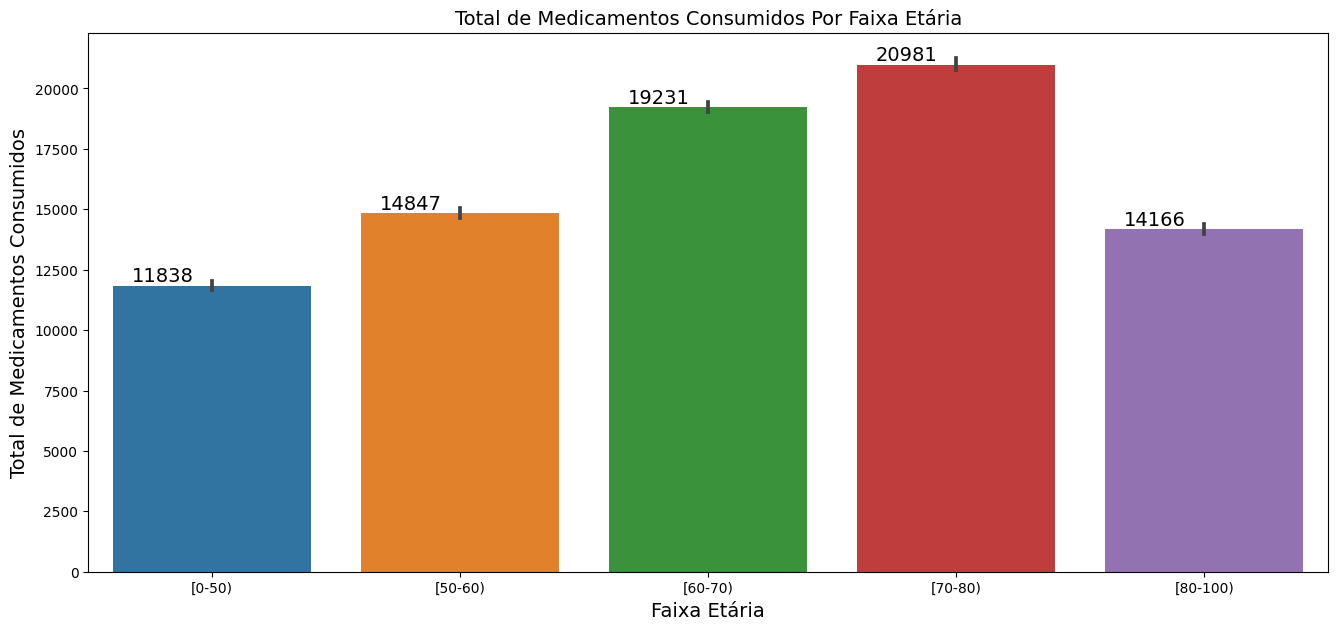

In [91]:
plt.figure(figsize = (16, 7))
figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = dados)
plt.xlabel('Faixa Etária', fontsize = 14, color = 'black')
plt.ylabel('Total de Medicamentos Consumidos', fontsize = 14, color = 'black')
plt.title('Total de Medicamentos Consumidos Por Faixa Etária', fontsize = 14, color = 'black')

for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.2, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 fontsize = 14,
                 color = 'black')
plt.show()

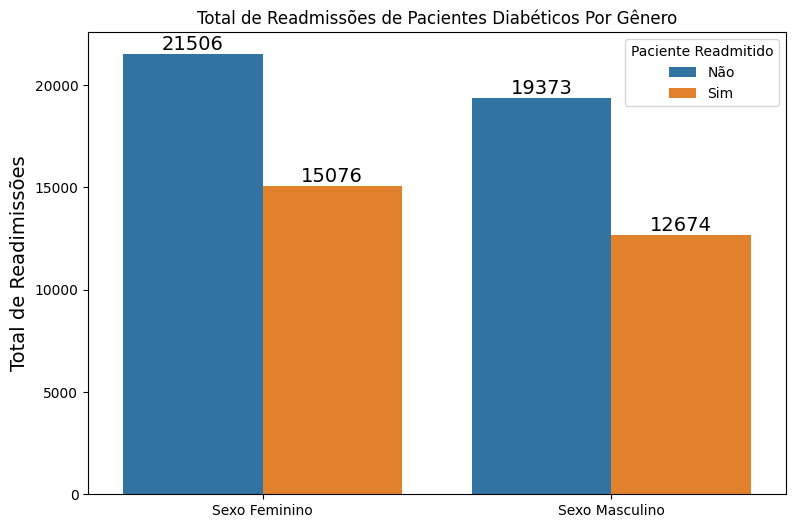

In [92]:
figx = sns.countplot(x = [('Sexo Feminino' if x == 0 else 'Sexo Masculino') for x in dados['gender']],
                     hue = 'readmitted',
                     data = dados)

figx.figure.set_size_inches(9, 6)
figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))
plt.ylabel('Total de Readimissões', fontsize = 14, color = 'black')
figx.axes.set_title('Total de Readmissões de Pacientes Diabéticos Por Gênero')
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.2, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 fontsize = 14,
                 color = 'black')
plt.show()

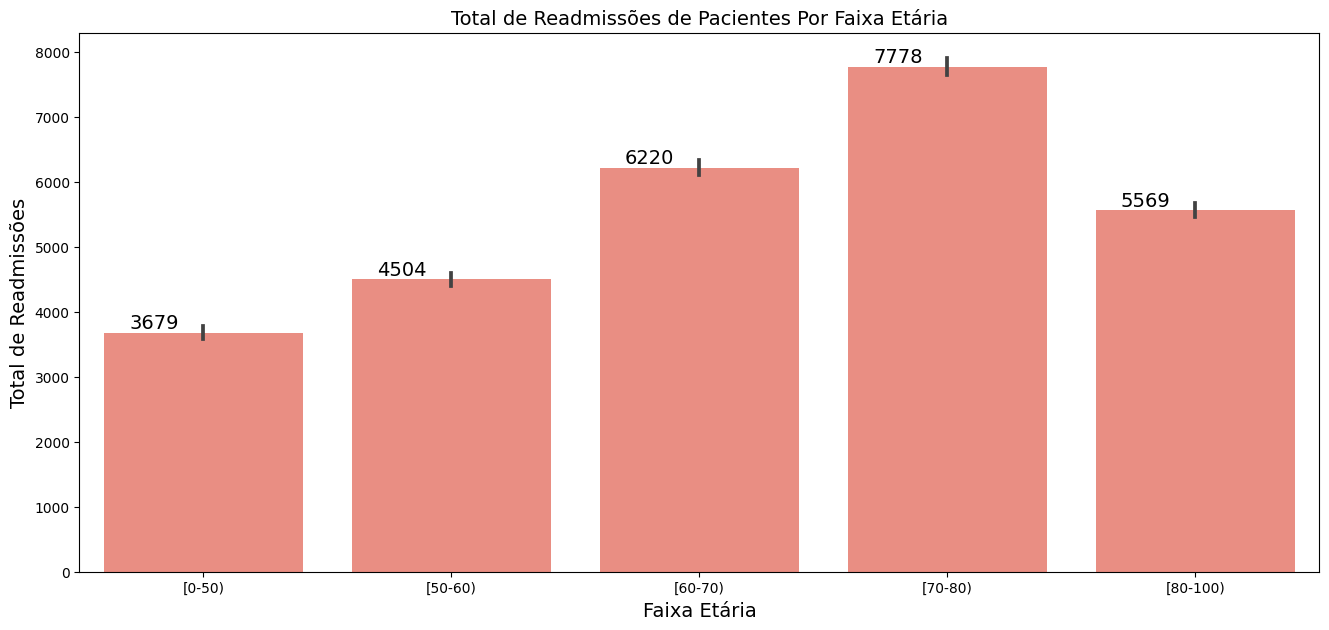

In [93]:
plt.figure(figsize = (16, 7))
figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = dados, color = 'salmon')
plt.xlabel('Faixa Etária', fontsize = 14, color = 'black')
plt.ylabel('Total de Readmissões', fontsize = 14, color = 'black')
plt.title('Total de Readmissões de Pacientes Por Faixa Etária', fontsize = 14, color = 'black')

for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.2, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 fontsize = 14,
                 color = 'black')
plt.show()

In [94]:
percentual_idade_readmissao = pd.crosstab(dados['age'], dados['readmitted'], 
                                          margins = True, normalize = 'index') * 100
percentual_idade_readmissao

readmitted,0,1
age,,
[0-50),64.915125,35.084875
[50-60),62.463539,37.536461
[60-70),59.647074,40.352926
[70-80),55.912028,44.087972
[80-100),57.449572,42.550428
All,59.565198,40.434802


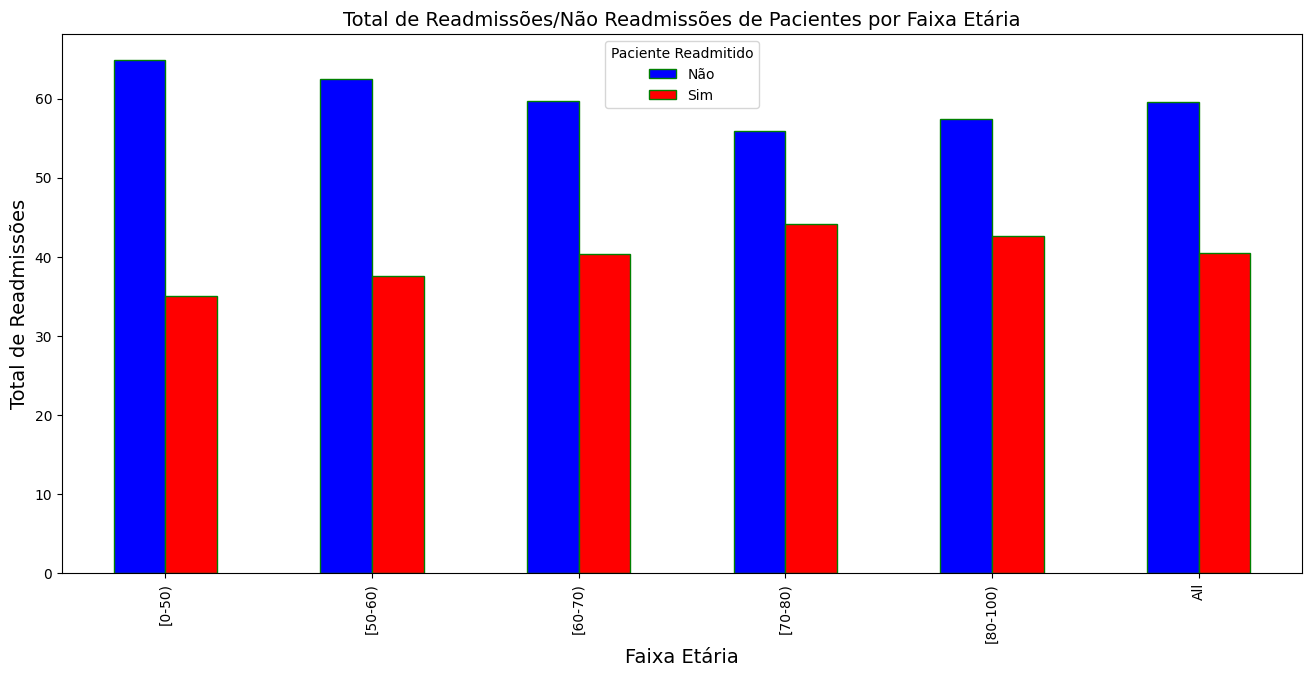

In [95]:
fig = percentual_idade_readmissao.plot(kind = 'bar',
                                      figsize = (16, 7),
                                      width = 0.5,
                                      edgecolor = 'g',
                                      color = ['b', 'r'])
plt.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))
plt.xlabel('Faixa Etária', fontsize = 14, color = 'black')
plt.ylabel('Total de Readmissões', fontsize = 14, color = 'black')
plt.title('Total de Readmissões/Não Readmissões de Pacientes por Faixa Etária', fontsize = 14, color = 'black')
for p in fig.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.2, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 fontsize = 14,
                 color = 'black')
plt.show()

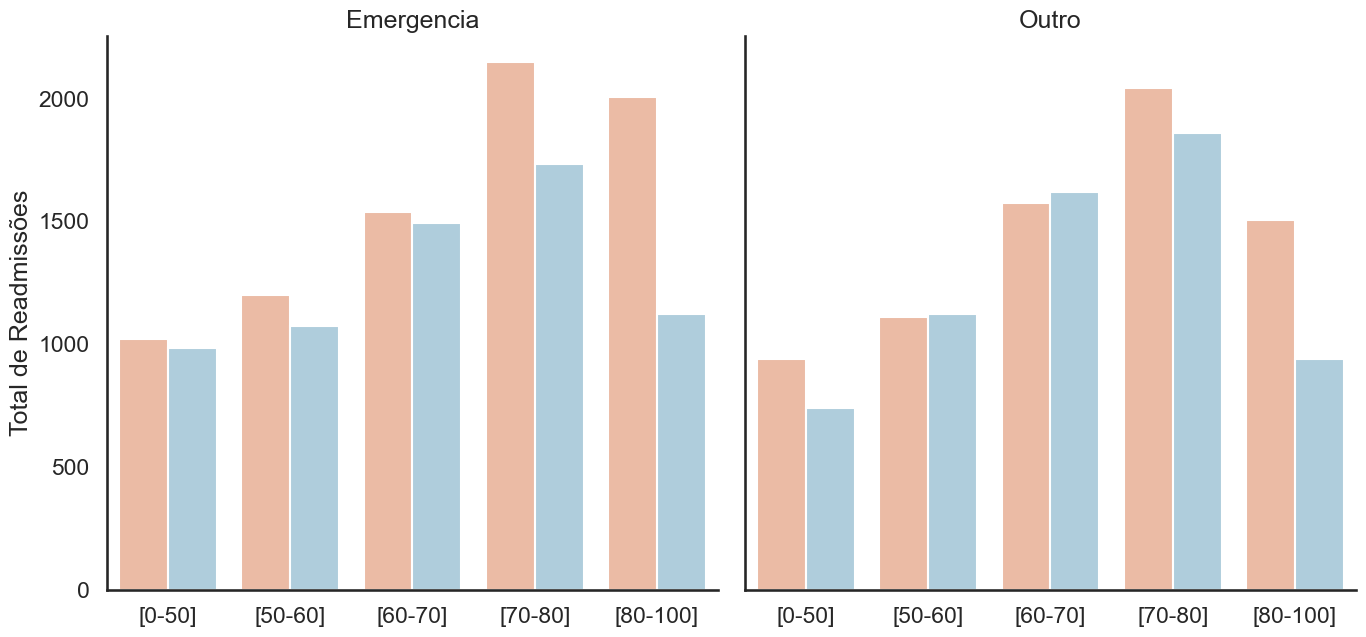

In [99]:
sns.set(style = 'white', context = 'talk')
g = sns.catplot(x = 'age', y = 'readmitted', hue = 'gender', col = 'admission_type_id',
                estimator = np.sum, data = dados, palette = 'RdBu', kind = 'bar', height = 7,
                aspect = 1, legend= False, errorbar = None)
(g.set_axis_labels("", "Total de Readmissões")
.set_xticklabels(["[0-50]","[50-60]","[60-70]","[70-80]","[80-100]"])
.set_titles("{col_name}"))
plt.show()

In [100]:
dados['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [102]:
df_temp = dados

In [103]:
df_temp['readmitted'] = df_temp['readmitted'].map({0: 'Não Readmitido', 1: 'Readmitido'})

In [105]:
df_temp['readmitted'].head(10)

0        Readmitido
1    Não Readmitido
2    Não Readmitido
3    Não Readmitido
4        Readmitido
5    Não Readmitido
6        Readmitido
7    Não Readmitido
8    Não Readmitido
9        Readmitido
Name: readmitted, dtype: object

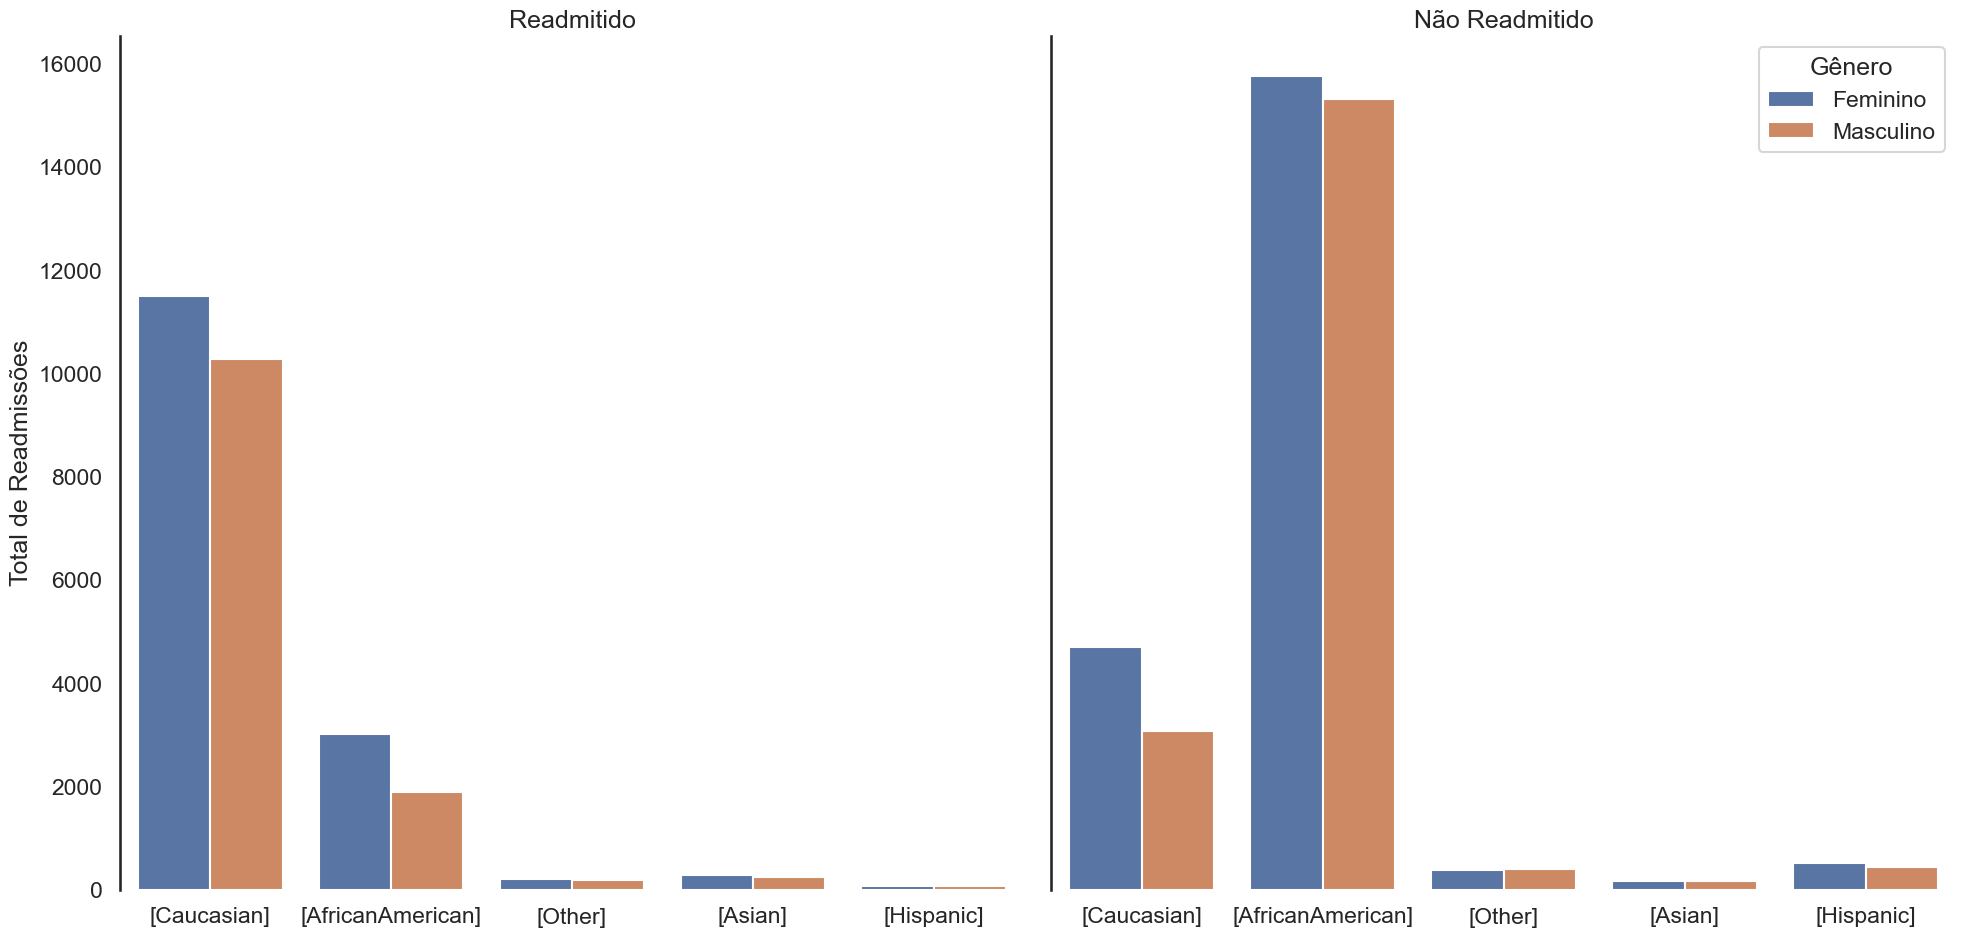

In [107]:
sns.set(style = 'white', context = 'talk')
def countplot(x, hue, **kwargs):
    sns.countplot(x = x, hue = hue, **kwargs)
    
grid = sns.FacetGrid(data = df_temp, col = 'readmitted', height = 10, aspect = 1)
fig = grid.map(countplot, 'race', 'gender', palette = 'deep')

(fig.set_axis_labels("", "Total de Readmissões")
.set_xticklabels(["[Caucasian]","[AfricanAmerican]","[Other]","[Asian]","[Hispanic]"])
.set_titles("{col_name}"))
plt.legend(title = 'Gênero', loc = 'upper right', labels = ['Feminino', 'Masculino'])

sns.despine(bottom = True)